<a href="https://colab.research.google.com/github/Cill19/Super-Store-Sales-Analysis-Using-EDA/blob/main/Latihan_1_Data_Analyst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Analisis Sampel Data Super Store**

## **Introduction**

Superstore merupakan ritel berskala besar yang menjual beragam produk dengan harga kompetitif. Namun, skala bisnis yang luas sering menghadirkan tantangan dalam menjaga profitabilitas.

Melalui Exploratory Data Analysis (EDA), kita dapat mengidentifikasi area lemah seperti kategori produk dengan profit rendah, wilayah penjualan yang kurang optimal, atau strategi diskon yang merugikan. Analisis ini bertujuan memberikan wawasan bisnis serta rekomendasi strategi untuk meningkatkan efisiensi dan keuntungan superstore.

## **Muat Dataset**

In [18]:
#1. import library
import pandas as pd
import os

#2. baca file path dataset
file_path = '/content/SampleSuperstore.csv'

#3. baca file dataset
print('DATASET')
print(df.head())
print('\n')


DATASET
        Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region         Category Sub-Category     Sales  Quantity  \
0        42420  South        Furniture    Bookcases  261.9600         2   
1        42420  South        Furniture       Chairs  731.9400         3   
2        90036   West  Office Supplies       Labels   14.6200         2   
3        33311  South        Furniture       Tables  957.5775         5   
4        33311  South  Office Supplies      Storage   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00 

## **Eksplorasi Data**

In [29]:
#1. Informasi Data
print("Informasi Data")
df.info()
print('\n')
print('Statistik Data Numerik')
df.describe()


Informasi Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


Statistik Data Numerik


,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.857901,3.789574,0.156203,28.656599
std,32063.693350,623.245124,2.225110,0.206452,234.260115
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [30]:
print('\n')
print('Statistik Data object')
df.describe(include='object')




Statistik Data object


,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category
count,9994,9994,9994,9994,9994,9994,9994,9994
unique,4,3,1,531,49,4,3,17
top,Standard Class,Consumer,United States,New York City,California,West,Office Supplies,Binders
freq,5968,5191,9994,915,2001,3203,6026,1523


## **Data Cleaning and Preparation**

In [33]:
#1. Penyesuaian Tipe Data
# mengubah kolom yang memungkinkan untuk diubah tipe datanya untuk tujuan mempermudah analisis
df['Postal Code'] = df['Postal Code'].astype(str)

df.info()
df.describe(include='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   object 
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 1015.1+ KB


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category
count,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,4,3,1,531,49,631,4,3,17
top,Standard Class,Consumer,United States,New York City,California,10035,West,Office Supplies,Binders
freq,5968,5191,9994,915,2001,263,3203,6026,1523


#Analisis Keuntungan dan Kerugian

In [45]:
#1. Grouping data by Category dan Sub Category
profit_by_product = df.groupby(['Category', 'Sub-Category'])['Profit'].sum().reset_index()

#2. urutkan data yang sudah digroup
worst_product_loss = profit_by_product.sort_values(by='Profit', ascending=True).head(3)

#3. menampilkan produk dari kategori yang sudah dibuat
print('Produk dengan kerugian terbesar')
print(worst_product_loss)
print('\n')


Produk dengan kerugian terbesar
           Category Sub-Category      Profit
3         Furniture       Tables -17725.4811
0         Furniture    Bookcases  -3472.5560
12  Office Supplies     Supplies  -1189.0995




In [53]:
#1. profit by product
profit_product = profit_by_product.sort_values(by='Profit', ascending=False).head(3)

print('Profit by Product')
print(profit_product)
print('\n')

Profit by Product
      Category Sub-Category      Profit
14  Technology      Copiers  55617.8249
16  Technology       Phones  44513.7306
13  Technology  Accessories  41935.6649




In [51]:
#1. analisis by region
profit_by_region = df.groupby('Region')['Profit'].sum().sort_values(ascending=False)
print('Profit by Region')
print(profit_by_region)
print('\n')

Profit by Region
Region
West       108417.4781
East        91522.7800
South       46749.4303
Central     39704.3625
Name: Profit, dtype: float64




In [54]:
#1. analisis by state
profit_by_state = df.groupby('State')['Profit'].sum().sort_values(ascending=False)
print('Profit by State')
print(profit_by_state)
print('\n')

Profit by State
State
California              76380.4163
New York                74038.5486
Washington              33402.6517
Michigan                24461.1876
Virginia                18597.9504
Indiana                 18382.9363
Georgia                 16250.0433
Kentucky                11199.6966
Minnesota               10823.1874
Delaware                 9977.3748
New Jersey               9772.9138
Wisconsin                8401.8004
Rhode Island             7285.6293
Maryland                 7031.1788
Massachusetts            6785.5016
Missouri                 6436.2105
Alabama                  5786.8253
Oklahoma                 4853.9560
Arkansas                 4008.6871
Connecticut              3511.4918
Nevada                   3316.7659
Mississippi              3172.9762
Utah                     2546.5335
Vermont                  2244.9783
Louisiana                2196.1023
Nebraska                 2037.0942
Montana                  1833.3285
South Carolina           1769.056

##**Visualisasi**

/tmp/ipython-input-2848186100.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-2848186100.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


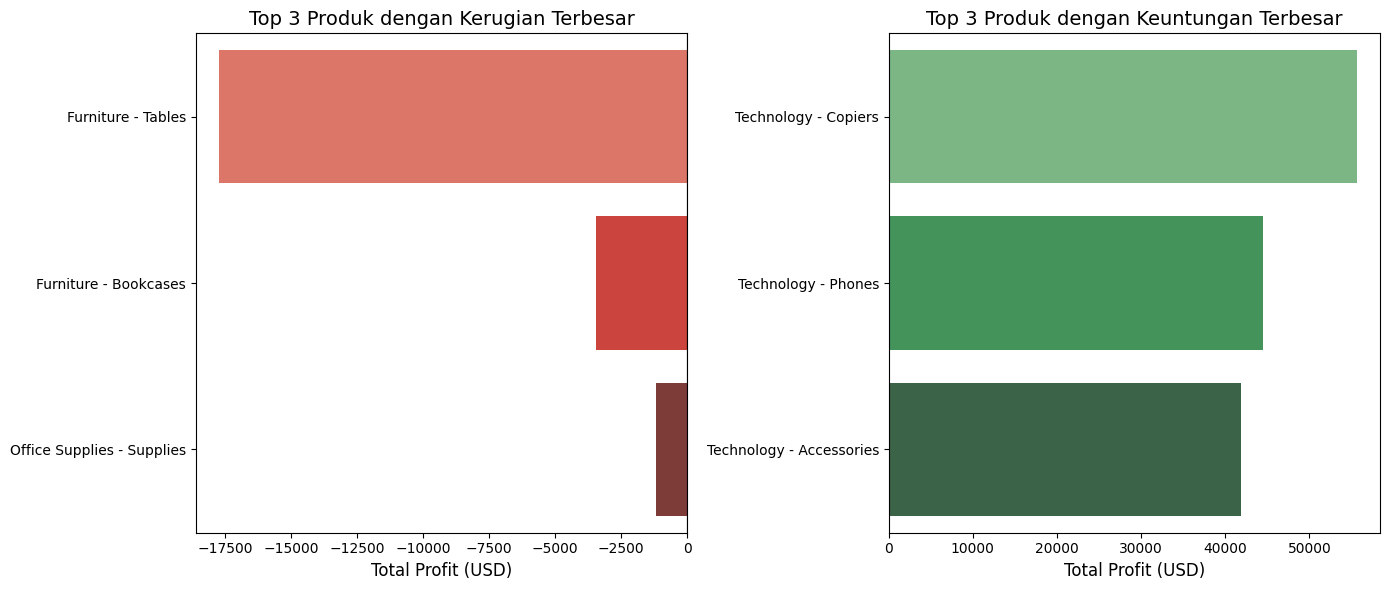

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gabungkan Category dan Sub-Category menjadi satu label
worst_product_loss['Product Name'] = worst_product_loss['Category'] + ' - ' + worst_product_loss['Sub-Category']
profit_product['Product Name'] = profit_product['Category'] + ' - ' + profit_product['Sub-Category']

plt.figure(figsize=(14, 6))

# --- Grafik Kiri: Produk Paling Merugi ---
plt.subplot(1, 2, 1) # 1 baris, 2 kolom, posisi 1
sns.barplot(
    x='Profit',
    y='Product Name',
    data=worst_product_loss,
    palette="Reds_d"
)
plt.title('Top 3 Produk dengan Kerugian Terbesar', fontsize=14)
plt.xlabel('Total Profit (USD)', fontsize=12)
plt.ylabel('')
plt.axvline(0, color='black', linewidth=0.8) # Garis nol untuk batas kerugian

# --- Grafik Kanan: Produk Paling Untung ---
plt.subplot(1, 2, 2) # 1 baris, 2 kolom, posisi 2
sns.barplot(
    x='Profit',
    y='Product Name',
    data=profit_product,
    palette="Greens_d"
)
plt.title('Top 3 Produk dengan Keuntungan Terbesar', fontsize=14)
plt.xlabel('Total Profit (USD)', fontsize=12)
plt.ylabel('')
plt.tight_layout()
plt.show()

/tmp/ipython-input-3498155772.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(
/tmp/ipython-input-3498155772.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(


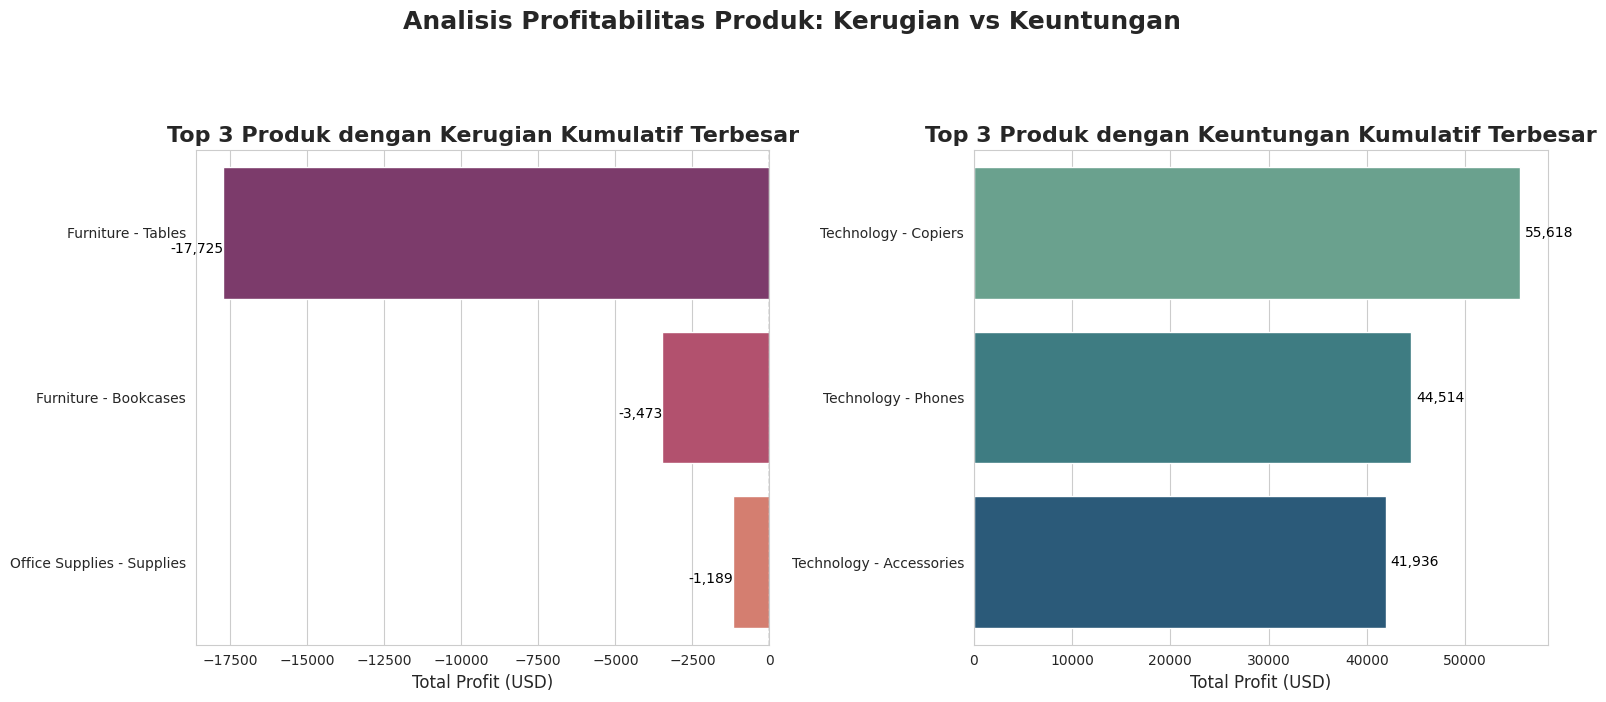

/tmp/ipython-input-3498155772.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax3 = sns.barplot(


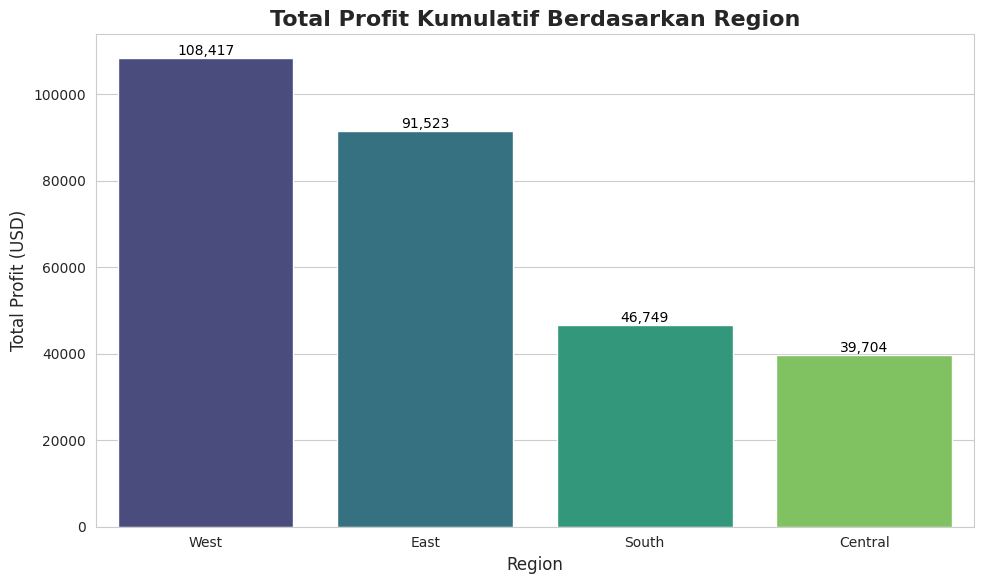

/tmp/ipython-input-3498155772.py:100: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax4 = sns.barplot(


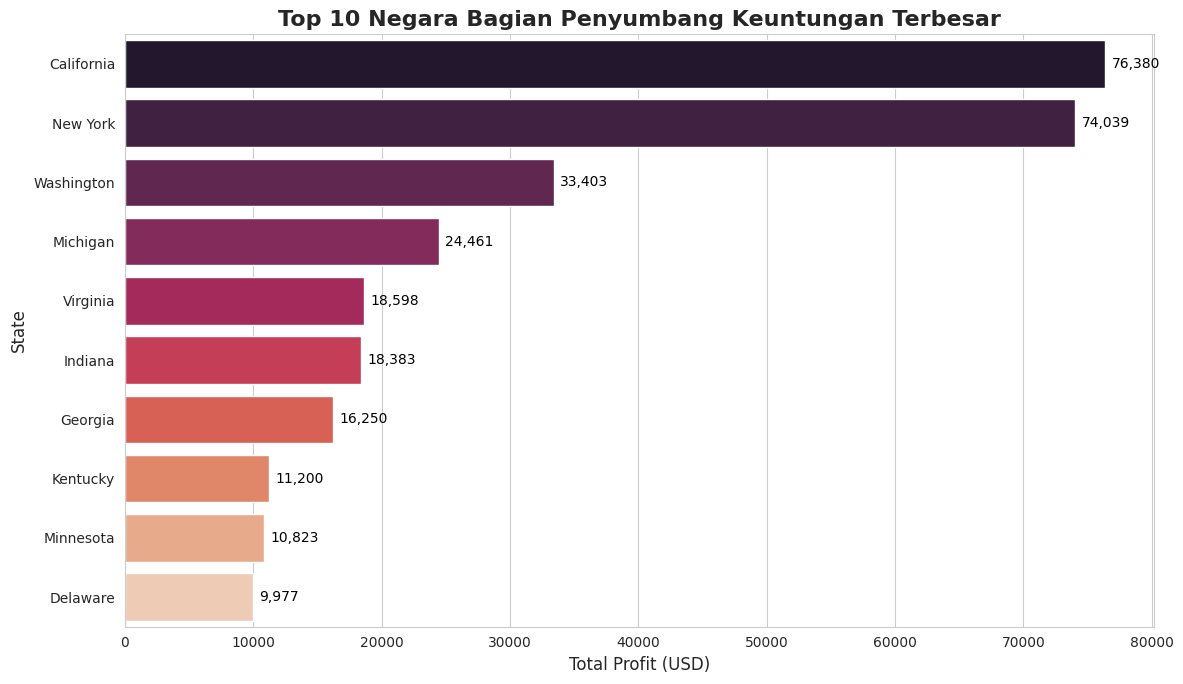

/tmp/ipython-input-3498155772.py:125: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax5 = sns.barplot(


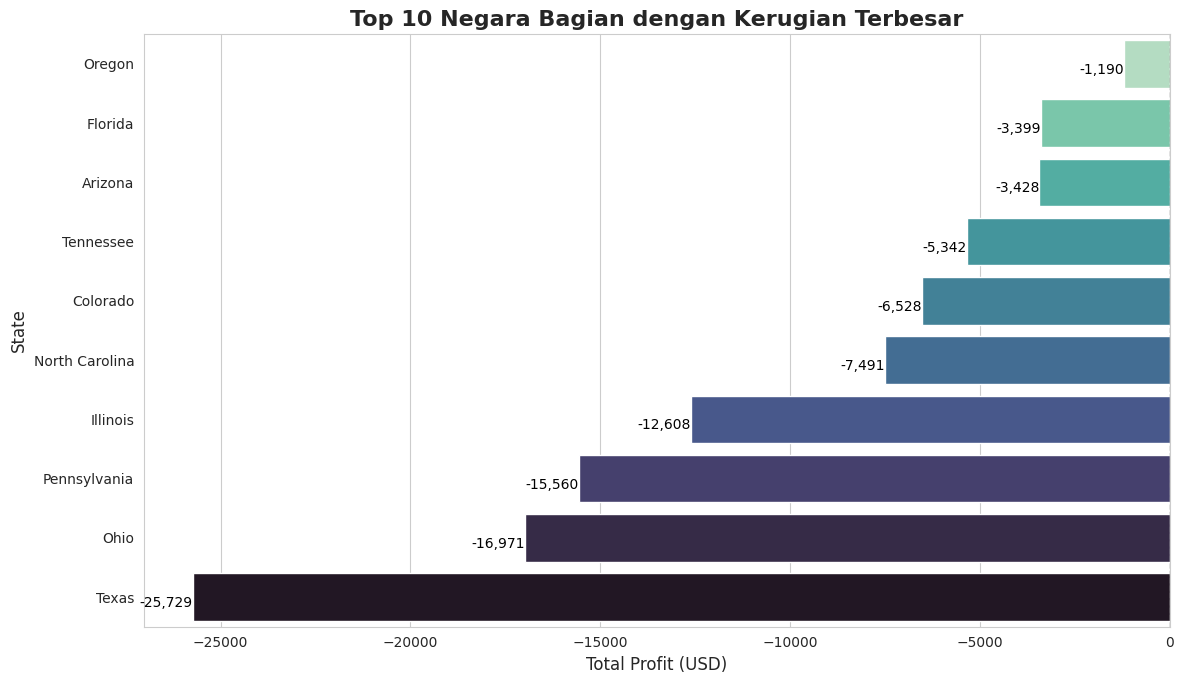

In [58]:


# --- Set Gaya Visualisasi Global ---
sns.set_style("whitegrid") # Gaya latar belakang
plt.rcParams['font.size'] = 12 # Ukuran font default
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 16

# --- Data yang Dibutuhkan ---
# worst_product_loss: 3 Sub-Category dengan Profit terendah (kerugian)
# profit_product: 3 Sub-Category dengan Profit tertinggi (keuntungan)
# profit_by_region: Total Profit per Region
# profit_by_state: Total Profit per State

# Gabungkan Category dan Sub-Category untuk label produk
worst_product_loss['Product Name'] = worst_product_loss['Category'] + ' - ' + worst_product_loss['Sub-Category']
profit_product['Product Name'] = profit_product['Category'] + ' - ' + profit_product['Sub-Category']

# --- Visualisasi 1: Kerugian vs Keuntungan Produk ---
plt.figure(figsize=(16, 7)) # Ukuran figure lebih besar

# Subplot 1: Produk Paling Merugi
plt.subplot(1, 2, 1)
ax1 = sns.barplot(
    x='Profit',
    y='Product Name',
    data=worst_product_loss,
    palette="flare_r" # Palet lebih menarik, '_r' untuk reverse jika ingin kerugian lebih merah
)
plt.title('Top 3 Produk dengan Kerugian Kumulatif Terbesar', fontsize=16, weight='bold')
plt.xlabel('Total Profit (USD)', fontsize=12)
plt.ylabel('')
plt.axvline(0, color='gray', linestyle='--', linewidth=1) # Garis nol yang lebih halus
# Menambahkan label nilai pada bar
for p in ax1.patches:
    width = p.get_width()
    plt.text(width - 0.5, p.get_y() + p.get_height()/2 + 0.1, # Posisi teks
             f'{width:,.0f}', # Format angka tanpa desimal
             ha='right', va='center', color='black', fontsize=10) # Aligment dan warna teks


# Subplot 2: Produk Paling Untung
plt.subplot(1, 2, 2)
ax2 = sns.barplot(
    x='Profit',
    y='Product Name',
    data=profit_product,
    palette="crest" # Palet lebih menarik
)
plt.title('Top 3 Produk dengan Keuntungan Kumulatif Terbesar', fontsize=16, weight='bold')
plt.xlabel('Total Profit (USD)', fontsize=12)
plt.ylabel('')
# Menambahkan label nilai pada bar
for p in ax2.patches:
    width = p.get_width()
    plt.text(width + 500, p.get_y() + p.get_height()/2,
             f'{width:,.0f}',
             ha='left', va='center', color='black', fontsize=10)

plt.suptitle('Analisis Profitabilitas Produk: Kerugian vs Keuntungan', fontsize=18, weight='bold', y=1.03) # Judul utama figure
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Merapikan layout dengan ruang untuk suptitle
plt.show()

print("\n") # Baris kosong untuk pemisah

# --- Visualisasi 2: Profit Berdasarkan Region ---
# Reset index agar profit_by_region menjadi DataFrame
region_df = profit_by_region.reset_index()

plt.figure(figsize=(10, 6))
ax3 = sns.barplot(
    x='Region',
    y='Profit',
    data=region_df,
    palette="viridis" # Palet warna yang cerah
)
plt.title('Total Profit Kumulatif Berdasarkan Region', fontsize=16, weight='bold')
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Profit (USD)', fontsize=12)
# Menambahkan label nilai pada bar
for p in ax3.patches:
    height = p.get_height()
    ax3.annotate(f'{height:,.0f}', # Format angka tanpa desimal
                 (p.get_x() + p.get_width() / 2., height),
                 ha='center', va='center',
                 xytext=(0, 5),
                 textcoords='offset points', fontsize=10, color='black')
plt.tight_layout()
plt.show()

print("\n") # Baris kosong untuk pemisah

# --- Visualisasi 3: Profit Berdasarkan State (Top 10) ---
# Ambil 10 State dengan Profit tertinggi
top_10_states = profit_by_state.head(10).reset_index()

plt.figure(figsize=(12, 7))
ax4 = sns.barplot(
    x='Profit',
    y='State',
    data=top_10_states,
    palette="rocket" # Palet warna yang menarik
)
plt.title('Top 10 Negara Bagian Penyumbang Keuntungan Terbesar', fontsize=16, weight='bold')
plt.xlabel('Total Profit (USD)', fontsize=12)
plt.ylabel('State', fontsize=12)
# Menambahkan label nilai pada bar
for p in ax4.patches:
    width = p.get_width()
    plt.text(width + 500, p.get_y() + p.get_height()/2,
             f'{width:,.0f}',
             ha='left', va='center', color='black', fontsize=10)
plt.tight_layout()
plt.show()

print("\n") # Baris kosong untuk pemisah

# --- Visualisasi 4: Profit Berdasarkan State (Top 10 Kerugian) ---
# Ambil 10 State dengan Profit terendah (kerugian terbesar)
worst_10_states = profit_by_state.tail(10).reset_index()

plt.figure(figsize=(12, 7))
ax5 = sns.barplot(
    x='Profit',
    y='State',
    data=worst_10_states,
    palette="mako_r" # Palet warna untuk kerugian
)
plt.title('Top 10 Negara Bagian dengan Kerugian Terbesar', fontsize=16, weight='bold')
plt.xlabel('Total Profit (USD)', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.axvline(0, color='gray', linestyle='--', linewidth=1) # Garis nol
# Menambahkan label nilai pada bar
for p in ax5.patches:
    width = p.get_width()
    plt.text(width - 0.5, p.get_y() + p.get_height()/2 + 0.1,
             f'{width:,.0f}',
             ha='right', va='center', color='black', fontsize=10)
plt.tight_layout()
plt.show()